#  Diabetes Risk prediction using  ML

In [ ]:
# steps  involved in our project
1.define objective ----To develop a model which can prrdict wheather
                         a person is going to have diabets or not
2.Data collections--- we have to collect  data of people with and 
                        with out diabetes
                     collected from UCI Machine learning repository
        
3.Data preprocessing /preparation  ----  in this step data is cleaned
4.Extract useful information from dataset
5.EDA (Exploratory data analysis)/data visualization
6.Model creation (use machine learning algorithm to train the model )
7.test the model and evaluate performance
8.Deployment                                 

In [ ]:
# knowledge required
python
numpy
pandas
matplotlib
seaborn
sklearn

tool---anaconda
editor--jupyter notebook
GUI--  tkinter

In [ ]:
# CSV file  ----comma separated file 
how to create ????
open notepad
store the values separated by comma
save as filename.csv

In [ ]:
#  data is collected from UCI  machine learning repository

In [ ]:
#  consider  a dataset   pima  indian  diabetes  dataset
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Blood Pressure: Diastolic blood pressure (mm Hg)
Skin Thickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
Diabetes Pedigree Function: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
    
UCI machine learning repository

In [3]:
#load 
import pandas as pd
columns=['pregnant','glucose','bp','skin','insulin','bmi',\
         'pedigree','age','class']
df=pd.read_csv("C:\\Users\\HP\\Desktop\\diabetes project\\pima.csv",\
               names=columns)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()  # display first 5 data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail() # last 5 rows

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape   #  row and column 

(768, 9)

In [7]:
#  how many people with and with out diabetse
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

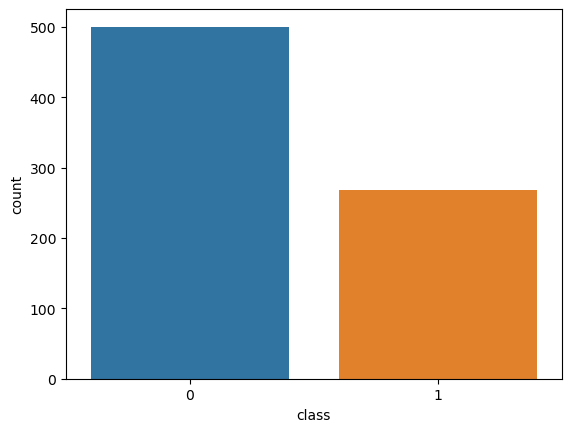

In [6]:
import seaborn as sns
sns.countplot(x=df['class'])

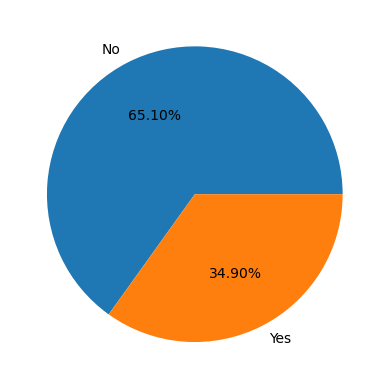

In [9]:
#  display data in percentage 
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(),labels=['No','Yes'],autopct="%0.2f%%")
plt.show()

In [8]:
#Explain the pregnant  column
df['pregnant'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [7]:
df['pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

In [9]:
#  we found most of women are o/1/2  time pregnant


199

In [9]:
df['glucose'].max()

199

In [10]:
df['glucose'].min()  #  glucose cant be zero  ....wrong data(missing data)

0

In [11]:
df['age'].min()

21

In [12]:
df['age'].max()

81

#  in which age range chances of diabetes is more

In [13]:
# how many people are between age 21-40
len(df.loc[df['age'].between(21,40)])

574

In [6]:
#  display in which age range people suffer diabetes most
len(df.loc[(df['age'].between(21,40)) &(df['class']==1)])

166

In [12]:
166/574  

0.289198606271777

In [14]:
# # how many people are between age 41-60
len(df.loc[df['age'].between(41,60)])

167

In [16]:
len(df.loc[(df['age'].between(41,60)) &(df['class']==1)])

95

In [17]:
95/167

0.5688622754491018

In [18]:
#  # how many people are between age 61-81
len(df.loc[df['age'].between(61,81)])

27

In [19]:
len(df.loc[(df['age'].between(61,81)) &(df['class']==1)])

7

In [20]:
7/27

0.25925925925925924

In [ ]:
#percentage of getting diabetes in age 21-40 = 28.9 %
#percentage of getting diabetes in age 41-60 = 56.8 %
#percentage of getting diabetes in age 61-81 = 25.9 %
#
#conclusion chances of diabete is more in age between 41-60

# Handle missing values

In [14]:
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
class       0
dtype: int64

In [15]:
#describe the dataset
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
most of columns have zero values as minimum values...  
but it is not possible  .  
ex
bp  cant be zero

that means zero represents missing value

In [24]:
#find no of zeros present in each column except  pregancy and class

In [16]:
len(df.loc[df['glucose']==0])

5

In [17]:
len(df.loc[df['bp']==0])

35

In [18]:
len(df.loc[df['skin']==0])

227

In [19]:
len(df.loc[df['insulin']==0])

374

In [20]:
len(df.loc[df['bmi']==0])

11

In [21]:
len(df.loc[df['pedigree']==0])

0

In [22]:
len(df.loc[df['age']==0])

0

In [4]:
# convert all the zero values by the median o that column
df['glucose']=df['glucose'].replace(0,df['glucose'].median())
df['bp']=df['bp'].replace(0,df['bp'].median())
df['skin']=df['skin'].replace(0,df['skin'].median())
df['insulin']=df['insulin'].replace(0,df['insulin'].median())
df['bmi']=df['bmi'].replace(0,df['bmi'].median())

In [9]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# separate input  and output
X=df.drop(columns=['class'])
Y=df['class']

In [6]:
#split  data set for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

#  scale dowon the features  by applying standard scaler

In [7]:
#  mean of vaalues in each column will be zero ,and standard deviation 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#  now  apply  knn model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=11)
#train the model
KNN.fit(X_train,Y_train)
#test the model
Y_pred_knn=KNN.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(Y_test,Y_pred_knn)
print("accuracy in knn is",round(acc_knn*100,2))

accuracy in knn is 76.62


In [27]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_knn)
print(cm)

[[88 12]
 [24 30]]


In [ ]:
     0     1
 
0    88   12

1    24   30

# apply logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression(solver='liblinear')
#train the model
L.fit(X_train,Y_train)
#test the model
Y_pred_lg=L.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test,Y_pred_lg)
print("accuracy in lg is",round(acc_lg*100,2))

accuracy in lg is 82.47


In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_lg)
print(cm)

[[91  9]
 [18 36]]


# apply naive bayes model

In [10]:
from sklearn.naive_bayes import GaussianNB
N=GaussianNB()
#train the model
N.fit(X_train,Y_train)
#test the model
Y_pred_nb=N.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test,Y_pred_nb)
print("accuracy in naive bayes is",round(acc_nb*100,2))

accuracy in naive bayes is 78.57


In [31]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_nb)
print(cm)

[[86 14]
 [19 35]]


#  apply  Decision tree model

In [11]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
#train the model
D.fit(X_train,Y_train)
#test the model
Y_pred_dt=D.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test,Y_pred_dt)
print("accuracy in decision tree is",round(acc_dt*100,2))

accuracy in decision tree is 70.13


In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_dt)
print(cm)

[[80 20]
 [25 29]]


#  apply   random forest  model

In [12]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier()
#train the model
R.fit(X_train,Y_train)
#test the model
Y_pred_rf=R.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(Y_test,Y_pred_rf)
print("accuracy in random forest  is",round(acc_rf*100,2))

accuracy in random forest  is 80.52


#  apply  support  vector machine

In [13]:
from sklearn.svm import SVC
S=SVC()
#train the model
S.fit(X_train,Y_train)
#test the model
Y_pred_svm=S.predict(X_test)
# find accuracy    
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(Y_test,Y_pred_svm)
print("accuracy in support vector  is",round(acc_svm*100,2))

accuracy in support vector  is 77.92


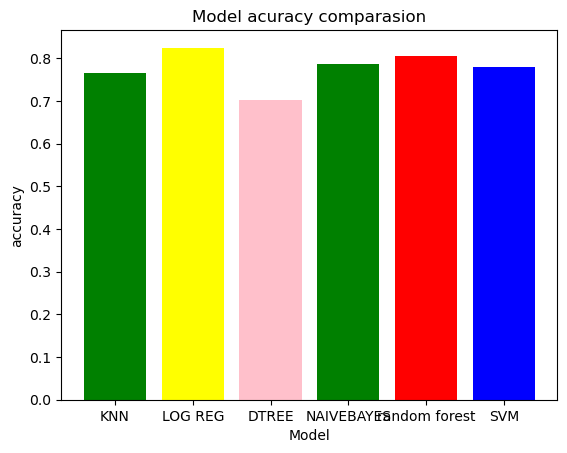

In [15]:
accuracy=[acc_knn,acc_lg,acc_dt,acc_nb,acc_rf,acc_svm]
models=['KNN','LOG REG','DTREE','NAIVEBAYES',"random forest","SVM"]
import matplotlib.pyplot as plt
plt.bar(models,accuracy,color=['green','yellow','pink','green','red','blue'])
plt.ylabel("accuracy")
plt.xlabel("Model")
plt.title("Model acuracy comparasion")
plt.show()

In [ ]:
# so best model for prediction is Logictic Regression

# Diabetes prediction  GUI

In [ ]:
# Diabetes    causes 

#  all over  world prevenstion

#  how  machine learning can be used to predict diabetes

# data set ---- describe each data item 

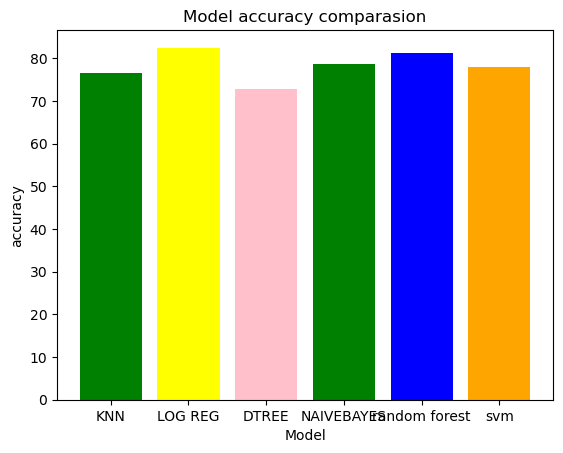

In [9]:
###########
##########################################################################
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from tkinter import messagebox as m
import pandas as pd
col_names=['pregnant','glucose','bp','skin','insulin',\
           'bmi','pedigree','age','class']
df=pd.read_csv("H:/mldataset/pima.csv",names=col_names)

# convert all the zero values by the median o that column
df['glucose']=df['glucose'].replace(0,df['glucose'].median())
df['bp']=df['bp'].replace(0,df['bp'].median())
df['skin']=df['skin'].replace(0,df['skin'].median())
df['insulin']=df['insulin'].replace(0,df['insulin'].median())
df['bmi']=df['bmi'].replace(0,df['bmi'].median())

# separate input  and output
X=df.drop(columns=['class'])
Y=df['class']
#split  data set for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#################Apply naive Bayes algorithm

def naive():
    global acc_nb
    from sklearn.naive_bayes import GaussianNB
    N=GaussianNB()
    #train the model
    N.fit(X_train,Y_train)
    #test the model
    Y_pred_nb=N.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_nb=accuracy_score(Y_test,Y_pred_nb)
    acc_nb=round(acc_nb*100,2)
    m.showinfo(title="NB",message="Accuracy is"+str(acc_nb)+"%")

#####Apply Decision Tree Algorithm####    

def dtree():
    global acc_dt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    D=DecisionTreeClassifier()
    #train the model
    D.fit(X_train,Y_train)
    #test the model
    Y_pred_dt=D.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_dt=accuracy_score(Y_test,Y_pred_dt)
    acc_dt=round(acc_dt*100,2)
    m.showinfo(title="DT",message="Accuracy is"+str(acc_dt)+"%")

############################################################################
#####################APPLY KNN ALGORITHM####################################


def knn():
    '''Apply KNN algorithm to data set'''
    global acc_knn
    from sklearn.neighbors import KNeighborsClassifier
    KNN=KNeighborsClassifier(n_neighbors=11)
    #train the model
    KNN.fit(X_train,Y_train)
    #test the model
    Y_pred_knn=KNN.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_knn=accuracy_score(Y_test,Y_pred_knn)
    acc_knn=round(acc_knn*100,2)
    m.showinfo(title="KNN",message="Accuracy is"+str(acc_knn)+"%")
def logreg():
    '''Apply Logistic Regression to Data Set'''
    global acc_lg
    global L
    from sklearn.linear_model import LogisticRegression
    L=LogisticRegression(solver='liblinear')
    #train the model
    L.fit(X_train,Y_train)
    #test the model
    Y_pred_lg=L.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_lg=accuracy_score(Y_test,Y_pred_lg)
    #print("accuracy in lg is",round(acc_lg*100,2))
    acc_lg=round(acc_lg*100,2)
    m.showinfo(title="LG",message="Accuracy is"+str(acc_lg)+"%")

def rf():
    global acc_rf
    from sklearn.ensemble import RandomForestClassifier
    R=RandomForestClassifier()
    #train the model
    R.fit(X_train,Y_train)
    #test the model
    Y_pred_rf=R.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_rf=accuracy_score(Y_test,Y_pred_rf)
    acc_rf=round(acc_rf*100,2)
    m.showinfo(title="RF",message="Accuracy is"+str(acc_rf)+"%")
def svm():
    global acc_svm
    from sklearn.svm import SVC
    S=SVC()
    #train the model
    S.fit(X_train,Y_train)
    #test the model
    Y_pred_svm=S.predict(X_test)
    # find accuracy    
    from sklearn.metrics import accuracy_score
    acc_svm=accuracy_score(Y_test,Y_pred_svm)
    acc_svm=round(acc_svm*100,2)
    m.showinfo(title="SVM",message="Accuracy is"+str(acc_svm)+"%")

def compare():
    accuracy=[acc_knn,acc_lg,acc_dt,acc_nb,acc_rf,acc_svm]
    models=['KNN','LOG REG','DTREE','NAIVEBAYES','random forest','svm']
    import matplotlib.pyplot as plt
    plt.bar(models,accuracy,color=['green','yellow','pink','green','blue','orange'])
    plt.ylabel("accuracy")
    plt.xlabel("Model")
    plt.title("Model accuracy comparasion")
    m.showinfo(title="Best model",message="best model is Logistic regression")
    plt.show()
    
##########################################################################
from tkinter import *
import numpy as np
w=Tk()

w.geometry("1200x800")
w.title("Diabetes Prediction System")
w.resizable(0,0)
vpreg=StringVar()
vglucose=StringVar()
vbp=StringVar()
vskin=StringVar()
vinsulin=StringVar()
vbmi=StringVar()
vpedegree=StringVar()
vage=StringVar()
def validate():
    if vpreg.get()=="" or vglucose.get()==""or vbp.get()=="" or vskin.get()==""\
       or vinsulin.get()=="" or vbmi.get()=="" or vpedegree.get()=="" or vage.get()=="":
        #m.showinfo(title="Wrong Input",message="please fill up all details")
        return
        
        
    
def predict():
    ''' It will predict the status of a new patient'''
    
    global L
    #global knnaccuracy
   
        
   
    a=float(vpreg.get())
    b=float(vglucose.get())
    c=float(vbp.get())
    d=float(vskin.get())
    e=float(vinsulin.get())
    f=float(vbmi.get())
    g=float(vpedegree.get())
    h=float(vage.get())
        #x=1
    
   
    z=[[a,b,c,d,e,f,g,h]]
    z_trans=sc.transform(z)
    print(z_trans)   
           
  
    l=L.predict(z_trans)
    if l==0:
        m.showinfo(title="Diabetes Prediction",message="You Have No Diabetes")
    else:
        m.showinfo(title="Diabetes Prediction",message="You have Diabetes or may get soon")
  
    
   
def reset():
    vpreg.set("")
    vglucose.set("")
    vbp.set("")
    vskin.set("")
    vinsulin.set("")
    vbmi.set("")
    vpedegree.set("")
    vage.set("")
    
img=PhotoImage(file="H:/ranjan/student project/iter/diabetesimage.png")
lblimage=Label(w,image=img)
lblimage.grid(row=1,column=1,rowspan=9)
labeltitle=Label(w,text="Enter Your Details!!!!",fg='red',font=('arial',20,'bold'))
labeltitle.grid(row=1,column=2,columnspan=2)
labelpreg=Label(w,text="Pregnant",font=('arial',20,'bold'))
labelpreg.grid(row=2,column=2)
entrypreg=Entry(w,font=('arial',20,'bold'),textvariable=vpreg)
entrypreg.grid(row=2,column=3)
labelglucose=Label(w,text="Glucose",font=('arial',20,'bold'))
labelglucose.grid(row=3,column=2)
entryglucose=Entry(w,font=('arial',20,'bold'),textvariable=vglucose)
entryglucose.grid(row=3,column=3)
labelbp=Label(w,text="Blood Pressure",font=('arial',20,'bold'))
labelbp.grid(row=4,column=2)
entrybp=Entry(w,font=('arial',20,'bold'),textvariable=vbp)
entrybp.grid(row=4,column=3)
labelskin=Label(w,text="Skin",font=('arial',20,'bold'))
labelskin.grid(row=5,column=2)
entryskin=Entry(w,font=('arial',20,'bold'),textvariable=vskin)
entryskin.grid(row=5,column=3)
labelinsulin=Label(w,text="Insulin",font=('arial',20,'bold'))
labelinsulin.grid(row=6,column=2)
entryinsulin=Entry(w,font=('arial',20,'bold'),textvariable=vinsulin)
entryinsulin.grid(row=6,column=3)
labelbmi=Label(w,text="Body Mass Index",font=('arial',20,'bold'))
labelbmi.grid(row=7,column=2)
entrybmi=Entry(w,font=('arial',20,'bold'),textvariable=vbmi)
entrybmi.grid(row=7,column=3)
#
labelpedegree=Label(w,text="Pedegree",font=('arial',20,'bold'))
labelpedegree.grid(row=8,column=2)
entrypedegree=Entry(w,font=('arial',20,'bold'),textvariable=vpedegree)
entrypedegree.grid(row=8,column=3)
#
labelage=Label(w,text="Age",font=('arial',20,'bold'))
labelage.grid(row=9,column=2)
entryage=Entry(w,font=('arial',20,'bold'),textvariable=vage)
entryage.grid(row=9,column=3)
#########################################################################
#########################################################################
btnpredict=Button(w,text="Predict",bg='yellow',width=10,relief='groove',font=('arial',20,'bold'),fg='green',command=predict)
btnpredict.grid(row=10,column=2)
btnreset=Button(w,text="Reset",bg='yellow',width=10,relief='groove',font=('arial',20,'bold'),fg='green',command=reset)
btnreset.grid(row=10,column=3)
btnknn=Button(w,text="  KNN  ",bg='cyan',font=('arial',20,'bold'),command=knn)
btnknn.grid(row=10,column=1)
btndt=Button(w,text="Decision Tree",bg='cyan',font=('arial',20,'bold'),command=dtree)
btndt.grid(row=11,column=1)
btndt=Button(w,text="Naive Bayes",bg='cyan',font=('arial',20,'bold'),command=naive)
btndt.grid(row=11,column=2)
btnlogreg=Button(w,text="Logistic Regression",bg='cyan',font=('arial',20,'bold'),command=logreg)
btnlogreg.grid(row=11,column=3)
btncompare=Button(w,text="Compare",bg='orange',border=10,font=('arial',20,'bold'),command=compare)
btncompare.grid(row=12,column=3)
btnrf=Button(w,text="Random Forest",font=('arial',20,'bold'),command=rf)
btnsvm=Button(w,text="Support vector",font=('arial',20,'bold'),command=svm)
btnrf.grid(row=12,column=1)
btnsvm.grid(row=12,column=2)

############################################################################
w.mainloop()